# Training Simple Machine Learning Algorithms for Classification

In this chapter, we will make use of two of the first algorithmically described machine learning algo-
rithms for classification: the perceptron and adaptive linear neurons.

The topics that we will cover in this chapter are as follows:
- Building an understanding of machine learning algorithms
- Using pandas, NumPy, and Matplotlib to read in, process, and visualize data
- Implementing linear classifiers for 2-class problems in Python

## Artificial neurons / Building an understanding of machine learning

- Before we discuss the perceptron and related algorithms in more detail, let’s take a brief tour of the
beginnings of machine learning.

> La relacion con una neurona biologica, dendritas, inputs, nucleo, axon.

- La definicion formal de una neurona artificial.

    More formally, we can put the idea behind artificial neurons into the context of a binary classification task with two classes: 0 and we can then define a decision function, 𝜎(z), that takes a linear combination of certain input values, x, and a corresponding weight vector, w, where z is the so-called net input z = w1x1 + w2x2 + ... + wmxm

  $$
\mathbf{w} = \begin{bmatrix} w_1 \\ \vdots \\ w_m \end{bmatrix}, \quad 
\mathbf{x} = \begin{bmatrix} x_1 \\ \vdots \\ x_m \end{bmatrix}
$$

    Now, if the net input of a particular example, $x^{(i)}$, is greater than a defined threshold, $\theta$, we predict class 1, and class 0 otherwise. In the perceptron algorithm, the decision function, $\sigma(\cdot)$, is a variant of a **unit step function**:

$$
\sigma(z) = \begin{cases}
1 & \text{if } z \geq \theta \\
0 & \text{otherwise}
\end{cases}
$$

- The perceptron learning rule

  The whole idea behind the MCP neuron and Rosenblatt’s thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either fires or it doesn’t.

> La regla del perceptron se refiere a un procesoque hay que seguir para ajugar los pesos y los sezgos de nuestros modelos

## Implementing a perceptron learning algorithm in Python

### An object-oriented perceptron API

We will take an object-oriented approach to defining the perceptron interface as a Python class, which
will allow us to initialize new Perceptron objects that can learn from data via a fit method and make
predictions via a separate predict method.

In [8]:
import numpy as np

class Perceptron:
    """Perceptron classifier."""

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


### Training a perceptron model on the Iris dataset

To test our perceptron implementation, we will restrict the following analyses and examples in the remainder of this chapter to two feature variables (dimensions).

In [9]:
import pandas as pd

# URL del dataset Iris (correctamente unida)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Leer el archivo CSV sin cabecera
df = pd.read_csv(url, header=None, encoding='utf-8')

# Mostrar las últimas 5 filas
df.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


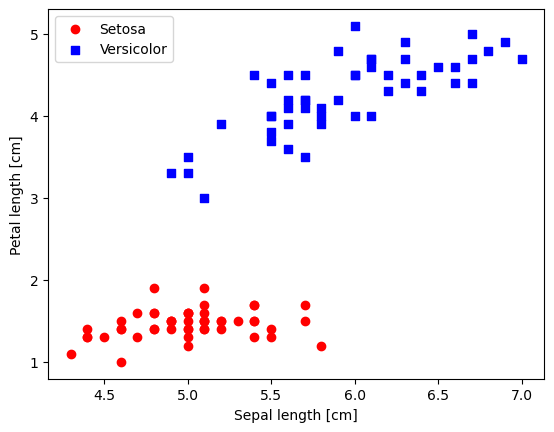

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionamos las clases Setosa y Versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# Seleccionamos las columnas: largo del sépalo (0) y largo del pétalo (2)
X = df.iloc[0:100, [0, 2]].values

# Graficamos los puntos para cada clase
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')

# Etiquetas y leyenda
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()


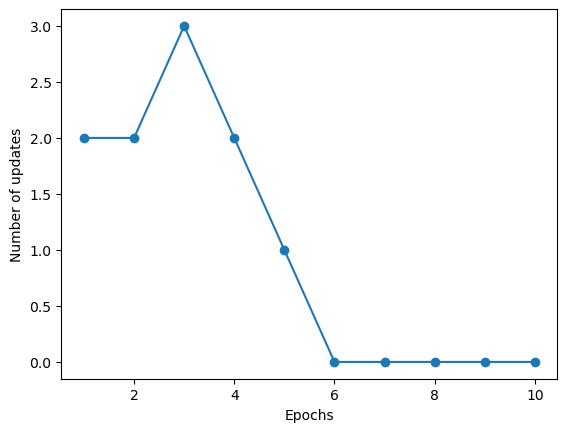

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = [(1.0, 0.0, 0.0),    # red
          (0.0, 0.0, 1.0),    # blue
          (0.56, 0.93, 0.56), # lightgreen
          (0.5, 0.5, 0.5),    # gray
          (0.0, 1.0, 1.0)]    # cyan
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

/tmp/ipykernel_17982/3037032827.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],


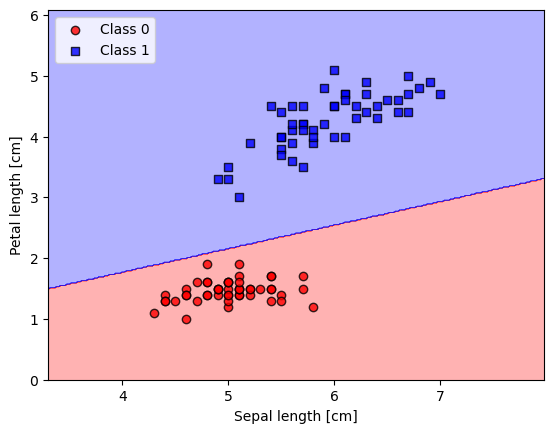

In [13]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Adaptive linear neurons and the convergence of learning

In this section, we will take a look at another type of single-layer neural network (NN): ADAptive LInear
NEuron (Adaline).

### Adaline linear neuron 

The Adaline algorithm is particularly interesting because it illustrates the key concepts of defining and minimizing continuous loss functions. This lays the groundwork for understanding other machine learning algorithms for classification, such as logistic regression, support vector machines, and multilayer neural networks, as well as linear regression models, which we will discuss in future chapters.

> La principal diferencia es que Adaline actualiza los pesos usando el error continuo de la salida lineal, mientras que el Perceptrón usa solo la clasificación final (0 o 1) para actualizar.

### Minimizing loss functions with gradient descent

One of the key ingredients of supervised machine learning algorithms is a defined objective function
that is to be optimized during the learning process

- MSE (Mean squared error)
$$
\mathcal{L}(w, b) = \frac{1}{2n} \sum_{i=1}^{n} \left( y^{(i)} - \sigma(z^{(i)}) \right)^2
$$
 

### Implementing Adaline in python

In [14]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    b_ : Scalar
    Bias unit after fitting.
    losses_ : list
    Mean squared error loss function values in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples
        is the number of examples and
        n_features is the number of features.
        y : array-like, shape = [n_examples]
        Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
        size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    def activation(self, X):
        """Compute linear activation"""
        return X
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))
                        >= 0.5, 1, 0)

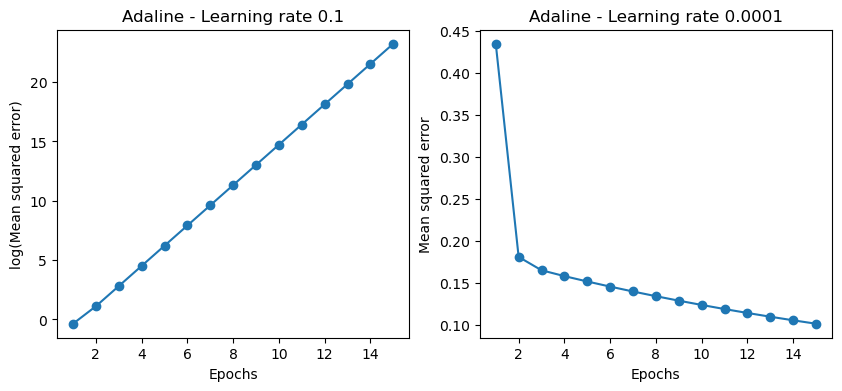

In [17]:
# Diferencia entre diferentes valores de n

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.01).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()


### Improving gradient descent through feature scaling

Gradient descent is one of the many algorithms that benefit from feature scaling. In this section, we will use a feature scaling method called standardization. This normalization procedure helps gradient descent learning to converge more quickly; however, it does not make the original dataset normally distributed.

> Usamos estandarizacion e nuestros datos de entreda, para que el descenso del gradiente.
> 
> ✅ Se vuelve más simétrico
> 
> ✅ Se mueve directamente hacia el mínimo del error
> 
> ✅ Hace que el error baje de forma estable y rápida

/tmp/ipykernel_17982/3037032827.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],


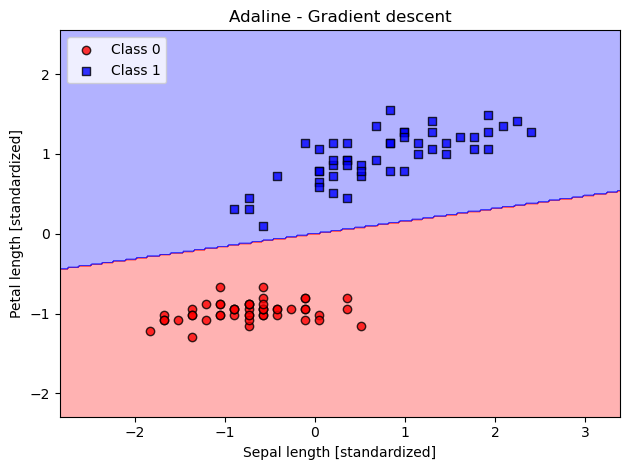

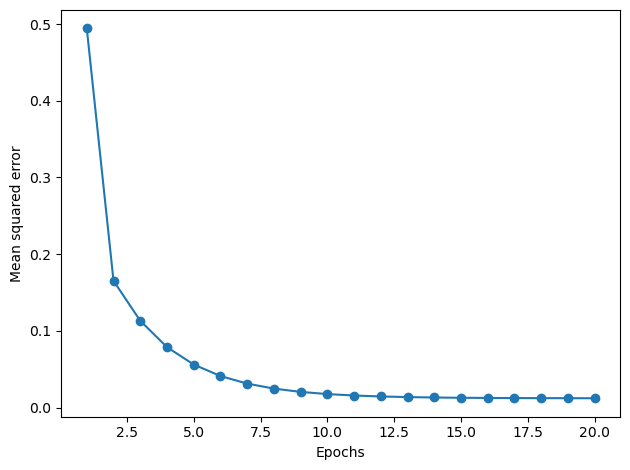

In [19]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()


### Large-scale machine learning and stochastic gradient descent

In the previous section, we learned how to minimize a loss function by taking a step in the opposite
direction of the loss gradient that is calculated from the whole training dataset; this is why this approach
is sometimes also referred to as full batch gradient descent.

In [20]:
import numpy as np

class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    b_ : float
        Bias unit after fitting.
    losses_ : list
        Mean squared error loss function value averaged over all training examples in each epoch.
    """

    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_initialized = False

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.

        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []

        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)

        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights."""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])

        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)

        return self

    def _shuffle(self, X, y):
        """Shuffle training data."""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers."""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights."""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * error
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss

    def net_input(self, X):
        """Calculate net input."""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation."""
        return X

    def predict(self, X):
        """Return class label after unit step."""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

/tmp/ipykernel_17982/3037032827.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],


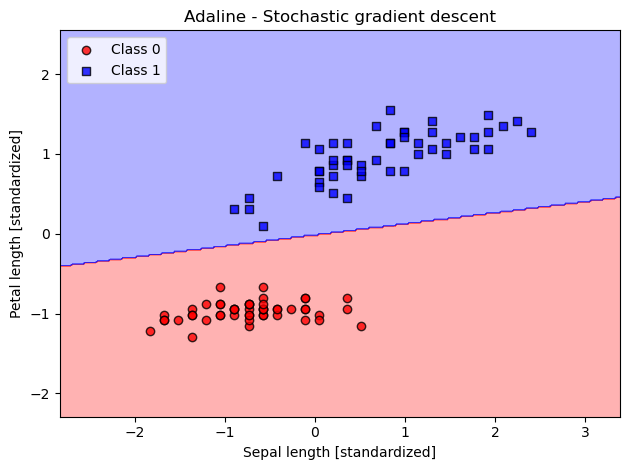

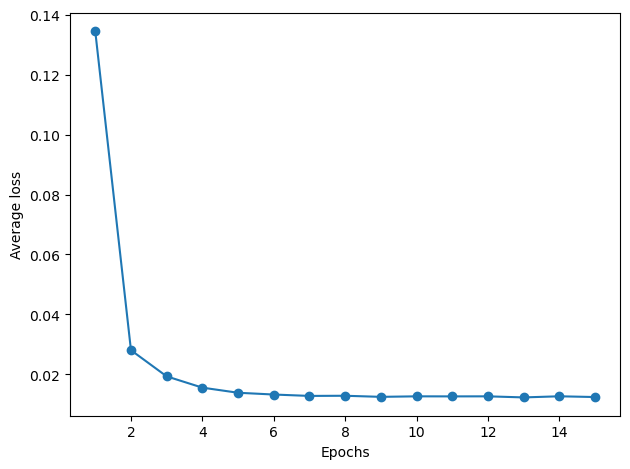

In [22]:
# We can then use the fit method to train the AdalineSGD classifier and use our plot_decision_regionsto plot our training results:

ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()
